In [1]:
import pytorch.dataloader.dl as dl
from pytorch.dataloader.dl import FlareEvent
from pytorch.config import SolarConfig
import os
from datetime import timedelta

data_path = '../../../data/'
# image_path = '/mnt/d/datasets/helioviewer/images_resized/'
image_path = os.path.join(data_path, 'flare_images_preprocessed')
batch_size = 1

config: SolarConfig = SolarConfig(
        local_data_path=data_path,
        image_data_path=image_path,
        image_dimension=(6, 512, 512),
        channels_name=["source_19"],
        timedimension_max_timedelta=timedelta(hours=16),
        flare_data_file="valid_flares_10h.pickle",
    )
dataloader, dataset = dl.get_dataloader(config, batch_size, 8, shuffle=True)

2024-04-18 14:40:02,389 INFO [28821] - Cache path: /home/andries/projects/mai-thesis/src/common/../../data/disk-cache/source-raw
2024-04-18 14:40:02,782 INFO [28821] - Loading annotations from ../../../data/


number of results 6171
number of filtered results #1 6170
number of filtered results #2 6170
number of filtered results #3 6170


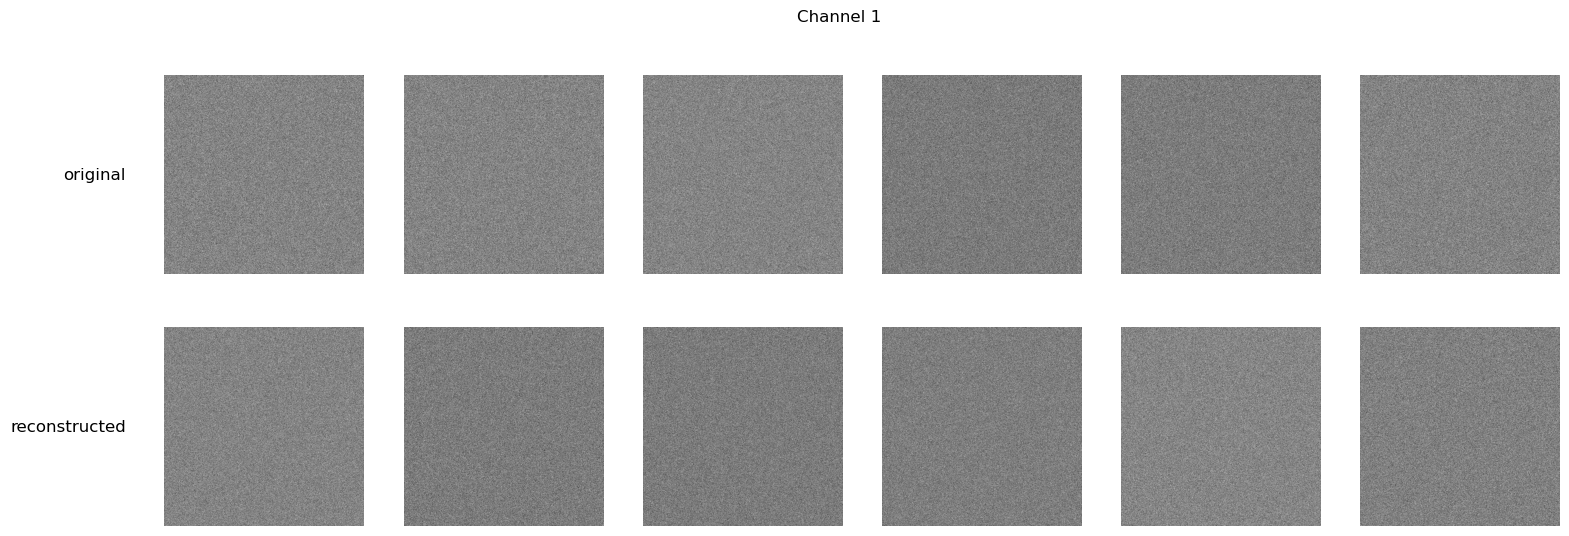

In [5]:
import matplotlib.pyplot as plt
import torch

# Assuming tensor is named 'tensor'
tensor = torch.randn(2, 1, 6, 512, 512)

# Loop through each channel
for channel in range(tensor.shape[1]):
    fig, axes = plt.subplots(2, 6, figsize=(18, 6))
    fig.suptitle('Channel {}'.format(channel+1))

    # Loop through each image
    for i in range(tensor.shape[0]):
        for j in range(tensor.shape[2]):
            # Plot the image in corresponding subplot
            axes[i, j].imshow(tensor[i, channel, j].numpy(), cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].grid(False)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

        # Add text annotation indicating which group it belongs to
        t =  'original' if i == 0 else 'reconstructed'
        axes[i, 0].text(-100, tensor.shape[3] // 2, t, fontsize=12, va='center', ha='right')

    plt.show()

In [3]:
data, label, sources_paths = next(iter(dataloader))
t = data[0]
image_arr = t[0]

t.shape, image_arr.shape, label, sources_paths

(torch.Size([1, 6, 512, 512]),
 torch.Size([6, 512, 512]),
 ('C2.1',),
 [[('2014-05-09T22_31_22Z.png',),
   ('2014-05-10T00_32_52Z.png',),
   ('2014-05-10T02_35_07Z.png',),
   ('2014-05-10T04_36_37Z.png',),
   ('2014-05-10T06_38_52Z.png',),
   ('2014-05-10T08_40_22Z.png',)]])

torch.Size([6, 512, 512])


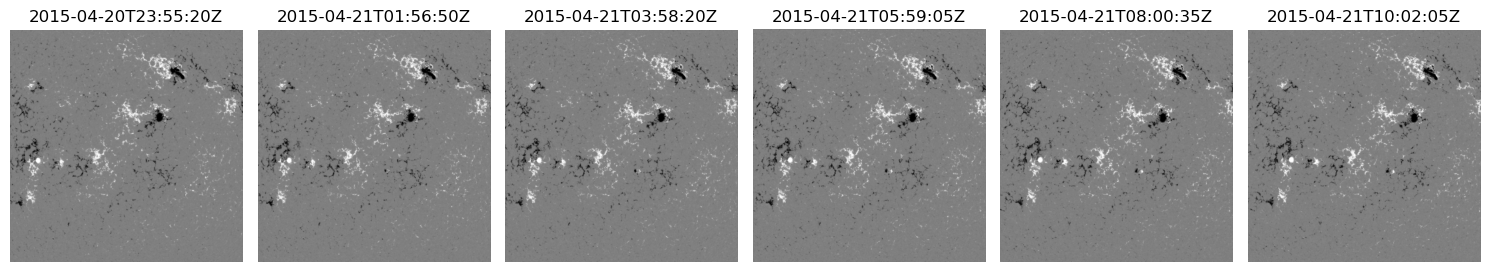

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t, label, filenames = dl.get_train_image_set(dataset, 1)
print(t.shape)

fig, axes = plt.subplots(1, 6, figsize=(15, 4))

for i in range(6):
    axes[i].imshow(t[i], cmap='gray')
    axes[i].set_title(filenames[i].replace('.png', '').replace('_', ':'))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# # Assuming you have a list of ndarrays called 'image_list'
# fig, axes = plt.subplots(1, len(image_list))

# for i, image in enumerate(image_list):
#     axes[i].imshow(image, cmap='gray')
#     axes[i].set_title(f'{labels[i]} flare')
#     axes[i].axis('off')

# plt.tight_layout()
# plt.show()


0 2012-06-14T14_18_41Z.jp2
1 2012-06-14T14_25_26Z.jp2
2 2012-06-14T14_31_26Z.jp2
3 2012-06-14T14_38_56Z.jp2
4 2012-06-14T14_44_56Z.jp2
5 2012-06-14T14_51_41Z.jp2


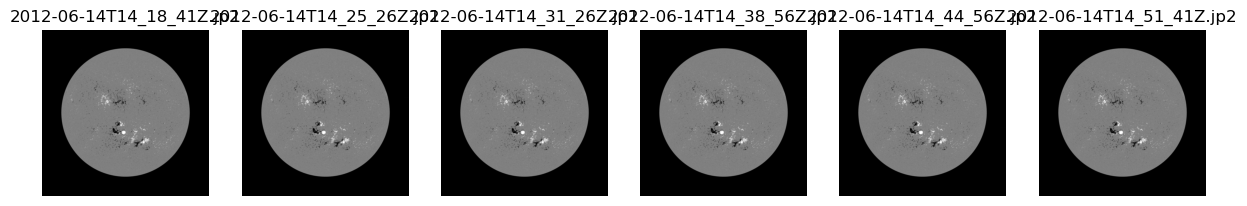

In [17]:
import matplotlib.pyplot as plt
import torchvision

fig, axes = plt.subplots(1, 6, figsize=(15, 4))
imgs = []
for i in range(6):
    title = sources_paths[0][i][0]
    print(i, title)
    axes[i].imshow(image_arr[i].numpy(), cmap='grey')
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np

imgs = []
for i in range(6):
    title = sources_paths[0][i][0]
    img = 
    axes[i].imshow(image_arr[i].numpy(), cmap='grey')
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()
